In [32]:
from careamics.lightning import LUNet

import torch
import pytorch_lightning as L

from careamics.config import load_configuration
from careamics.dataset.prepare_dataset import (
    get_train_dataset,
    get_validation_dataset,
    get_prediction_dataset,
)

import matplotlib.pyplot as plt

from careamics.utils.normalization import denormalize
from careamics.prediction import stitch_prediction


In [2]:
cfg = load_configuration(
    "/home/igor.zubarev/projects/caremics/examples/2D/n2v/n2v_2D_BSD.yml"
)
train_path = "/home/igor.zubarev/projects/caremics/examples/2D/data/denoising-N2V_BSD68.unzip/BSD68_reproducibility_data/train"
val_path = "/home/igor.zubarev/projects/caremics/examples/2D/data/denoising-N2V_BSD68.unzip/BSD68_reproducibility_data/val"
test_path = "/home/igor.zubarev/projects/caremics/examples/2D/data/denoising-N2V_BSD68.unzip/BSD68_reproducibility_data/test/image"


In [13]:
train_dataset = get_train_dataset(cfg, train_path)
train_dataloader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=128,
    num_workers=0,
    pin_memory=False,
)

val_dataset = get_validation_dataset(cfg, val_path)
val_dataloader = torch.utils.data.DataLoader(
    val_dataset,
    batch_size=128,
    num_workers=0,
    pin_memory=False,
)

pred_dataset = get_prediction_dataset(
    cfg, pred_source=val_path, tile_shape=(128, 128), overlaps=(48, 48)
)
pred_dataloader = torch.utils.data.DataLoader(
    pred_dataset,
    batch_size=1,
    num_workers=0,
    pin_memory=False,
)


Computed dataset mean: 110.72953033447266, std: 63.656009674072266
Computed dataset mean: 96.2784652709961, std: 60.512428283691406
Calculated mean and std for 1 images
Mean: 96.2784652709961, std: 60.512428283691406


In [14]:
model = LUNet(cfg)
trainer = L.Trainer(max_epochs=10)

Engine initialized from configuration


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [ ]:
# trainer.fit(model, train_dataloader, val_dataloader)


In [15]:
pred = trainer.predict(model, pred_dataloader)


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/localscratch/mambaforge/envs/light/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.


Predicting: |          | 0/? [00:00<?, ?it/s]

In [22]:
tiles = []
data = []
for p in pred:
    tiles.append(p[0])
    data.append(p[1][1:])

In [27]:
out = stitch_prediction(tiles, data)

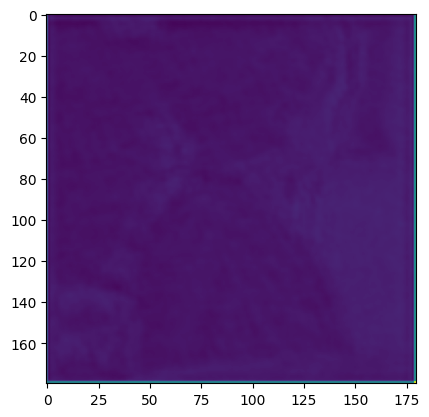

In [31]:
plt.imshow(out)